<a href="https://colab.research.google.com/github/Cmeek09/Computer-Vision/blob/main/Copmuter_vision_CM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Project



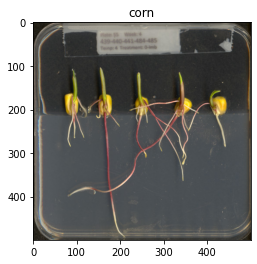

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


#//load up the images
img = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
#src1 = cv.imread("/content/mydata/man.jpg", cv.IMREAD_COLOR)
plt.figure()
plt.title('corn')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB) )

# Basic requirements:

1. Tell how many seeds there are
2. Germination rate
3. Any roots and any coleoptile for each seed.

Mark all the above information in the image and show them out.

Bonus  up to 5 points:

Additional analysis and any guidance information provided to farmers and researchers.
________________________________________________________________________

## ENDOSPERMS

To start I'll record how many seeds are in the image, I'll use morphological tools and edge detection to get the corn seed (endosperm) by itself then label them as well.   



there are 5 endosperms detected


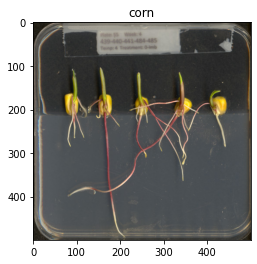

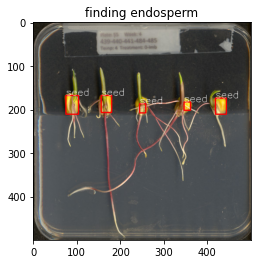

In [ ]:
# Import dependencies
import cv2  as cv
import matplotlib.pyplot as plt
import numpy as np


# getting original image
img = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
#src1 = cv.imread("/content/mydata/man.jpg", cv.IMREAD_COLOR)
plt.figure()
plt.title('corn')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

# convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# morphological
kernel = np.ones((5,5), np.uint8)
opening = cv.morphologyEx(gray, cv.MORPH_OPEN, kernel)
kernel = np.ones((15,15), np.uint8)
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)


# blurred
blurredIm = cv.medianBlur(closing, 25)

# morphological ++
kernel2 = np.ones((5,5), np.uint8)
opening2 = cv.morphologyEx(blurredIm, cv.MORPH_OPEN, kernel2)
kernel2 = np.ones((15,15), np.uint8)
closing = cv.morphologyEx(opening2, cv.MORPH_CLOSE, kernel2)

# draing contours to find "shape" of cornseed/edosperm
ret,thresh = cv.threshold(closing,127,255,0)

length, width = thresh.shape
radius = .5*min(length,width)
for i in range(length):     # this is the row
    for j in range(width):  # this is the column
      if radius > ((i+length) + (i-width)):
        thresh[i,j] = 0


contours,hierarchy = cv.findContours(thresh, -1, 1)
image = closing
for contour in contours:
    convexHull = cv.convexHull(contour)
    cv.drawContours(image, [convexHull], -1, (255, 0, 0), 2)

contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv.approxPolyDP(c, 3, True)
    boundRect[i] = cv.boundingRect(contours_poly[i])
    centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])


drawing = img
# Draw polygonal contour + bonding rects + circles
for i in range(len(contours)):
    color = [0,0,255]
    cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
      (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
    cv.putText(drawing, 'seed', (int(boundRect[i][0]), int(boundRect[i][1])), cv.FONT_HERSHEY_SIMPLEX, .75, (255, 255, 255), 1)

plt.figure()
plt.title('finding endosperm')
plt.imshow(cv.cvtColor(drawing,cv.COLOR_BGR2RGB) )

print("there are " + str(len(contours)) + " endosperms detected")

## *Results*

Ok, although Erik was kind enough to provide RGB thresholds for the endosperm and cleopitles.  I wanted to "find" the cornseed by shape as getting rid of lines from the sprout and roots seemed like a perfect application for the morphological tools we learned in class. Anyway, this involved kinda doubling the morphological tools or what I label as as closing ++.  Another step needed was actually getting the resulting image to only have the corn showing.  As after the morphing is done, it still captures the white square in the top right as well as the display case image.  Using the techniques from the first assignment, I just blacked out the top portion of the image with a nested for loop usig the legnth and width of the reuslting image.  This was needed to ge the seeds by themelves and from there I had to use contours as the shape detection of the corn, if you will.  Eventhough contouring is mainly used to following edges, I've angled such that only the cornseeds are there and thankfully they don't connect or anything like that.  Meaning I could also double the amount of contours as the cornseed counter too.  

## Second attempt

I had done the prior attempt before the updated RGB threshold values were given.  This was added later, but after seeing how nicely the cleoptlies and roots were drawn with contours via RGB thresholding, I wanted to try it with this as well for the endosperm / cornseeds.  I'm still going to label them as well with bounding boxes.

there are 5 endosperm detected


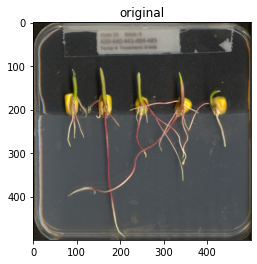

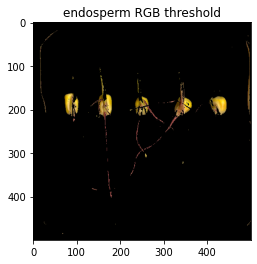

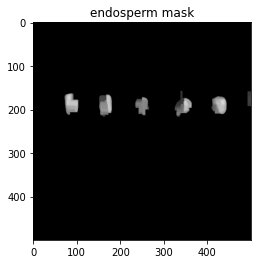

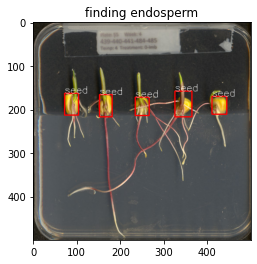

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


#//load up the images
src = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
#src1 = cv.imread("/content/mydata/man.jpg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB) )

# RGB threshold for for colors on coleoptiles
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
lower = np.array([0, 115, 77])
upper = np.array([27, 255, 255])
mask = cv2.inRange(hsv, lower, upper)
result = cv2.bitwise_and(src, src, mask=mask)
plt.figure()
plt.title('endosperm RGB threshold')
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))

# convert to grayscale
gray = cv.cvtColor(result, cv.COLOR_BGR2GRAY)

dilated = cv2.dilate(gray, (3, 3), iterations=1)

# morphological
kernel = np.ones((5,5), np.uint8)
opening = cv.morphologyEx(dilated, cv.MORPH_OPEN, kernel)
kernel = np.ones((15,15), np.uint8)
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)

# morphological ++
kernel = np.ones((5,5), np.uint8)
opening2 = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)
kernel = np.ones((15,15), np.uint8)
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
plt.figure()
plt.title('endosperm mask')
plt.imshow(cv.cvtColor(closing,cv.COLOR_BGR2RGB))

length, width = closing.shape
radius = .9*min(length,width)
for i in range(length):     # this is the row
    for j in range(width):  # this is the column
      if radius < ((j+length/8) + (j-width)):
        closing[i,j] = 0


# Find the contours
cnts = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 300
endospermCount = []
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        endospermCount.append(c)
        # cv2.drawContours(src,[c], 0, (36,255,12), 2)


cnts_poly = [None]*len(cnts)
boundRect = [None]*len(cnts)
centers = [None]*len(cnts)
radius = [None]*len(cnts)
for i, c in enumerate(cnts):
    cnts_poly[i] = cv.approxPolyDP(c, 3, True)
    boundRect[i] = cv.boundingRect(cnts_poly[i])
    centers[i], radius[i] = cv.minEnclosingCircle(cnts_poly[i])


drawing = src
# Draw polygonal contour + bonding rects
for i in range(len(cnts)):
    color = [0,0,255]
    cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
      (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
    cv.putText(drawing, 'seed', (int(boundRect[i][0]), int(boundRect[i][1])), cv.FONT_HERSHEY_SIMPLEX, .75, (255, 255, 255), 1)

plt.figure()
plt.title('finding endosperm')
plt.imshow(cv.cvtColor(drawing,cv.COLOR_BGR2RGB) )


print("there are " + str(len(endospermCount)) + " endosperm detected")

## *Results*

I think overall this is a better approach than the first attempt.  On the fourth seed, its not perfect because grabs the some of the sprout or coleoptile.  Also I need to chop off the right border side of the image to elminate som noise as it contours around it and makes it another label item.  That said, it sizes the corn seed better for all of them and is a more accurate representation of the endosperms

________________________________________________________________________

## COLEOPTILES

Now for coleoptile(s), I'll be implementing Eriks provided thresholding for them and working from there.  Once the RGB threshold as been applied, then the easiest way to do this is convert to grayscale, then finding contours, then adding some logic to filter out contour shpaes that are too small.  The RGB thresholding makes this really straightfoward to getting the results.  From the image and reading provided for, the coleoptiles are the top of the cornseed, meaning we should get 5 of them as a result.  


there are 5 coleoptiles, one for each seed


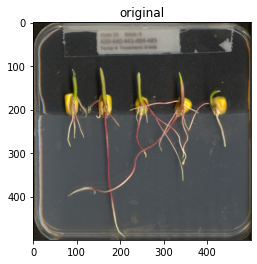

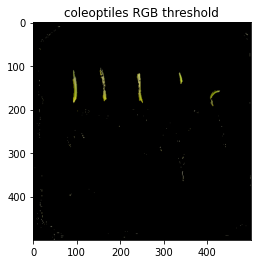

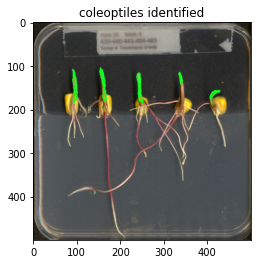

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

#//load up the images
src = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
#src1 = cv.imread("/content/mydata/man.jpg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB) )

# RGB threshold for for colors on coleoptiles
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
lower = np.array([28, 36, 97])
upper = np.array([42, 255, 228])
mask = cv2.inRange(hsv, lower, upper)
result = cv2.bitwise_and(src, src, mask=mask)
plt.figure()
plt.title('coleoptiles RGB threshold')
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))

# convert to grayscale
gray = cv.cvtColor(result, cv.COLOR_BGR2GRAY)

# Find the contours
cnts = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 50
coleoCount = []
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        coleoCount.append(c)
        cv2.drawContours(src,[c], 0, (36,255,12), 2)

plt.figure()
plt.title('coleoptiles identified')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB) )

print("there are " + str(len(coleoCount)) + " coleoptiles, one for each seed")


## *Results*

As intended from the second image, the green of the coleoptiles is the only thing remaining from the original image.  Finding the contour of those is just taking the shape of them.  I could have gone and found the binary threshold with these as well; however, it looks like the grayscal and area limit provide enough logic to grab the correct amount of coleoptiles.  Similar to the endosperms, this isn't an exact match to a perfect reuslt, as the fourth cornseed is discolored (I'll talke about this in the extra credit); but I think it is adequate to represent the coleoptiles.

________________________________________________________________________

## ROOTS

Again, sort've working off the erik's code, I'm wanting to get the roots by themselves here and get the count of them as well.  The RGB threshold for the roots are too spread out color wise, to purely get them by themselves.  So, I'll get the entire corn seed with roots and all with a RGB threshold I found myself and using a technique used in th endosperm detection. As to limit the noise I'd possibly pick up in process of getting the shape of them, I'm cutting off the top half of the image (around y = 210).  This is to only of the endosperm as a base and get the roots from that as will.  This also address the germination rate as all cornseeds have some  amoundt of root(s). From the image and readings in the assignment, it shows at any root shown is in the germination process, I'll expand on this further, but sense each seed as a root at least, then we know germination is happening, which makes this a binary result.  However, I would like to drill down on this more.



there are 5 roots detected
germination rate is 100 %


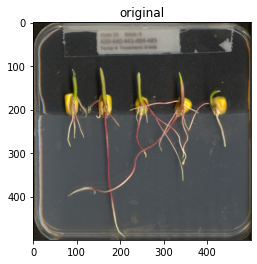

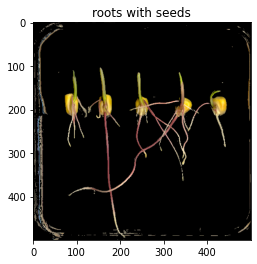

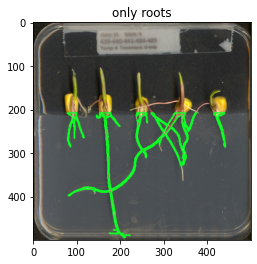

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math

#//load up the images
src = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB) )

#colors of roots
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
lower = np.array([0, 41, 101])
upper = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower, upper)
result = cv2.bitwise_and(src, src, mask=mask)

plt.figure()
plt.title('roots with seeds')
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))

#convert to grayscale & get dimensions of result
grayResult = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
length, width = grayResult.shape

# remove or black out the parts of iamge that will count for contours otherwise
radius = .83*min(length,width)
radius2 = .25*min(length,width)
for i in range(length):     # this is the row
    for j in range(width):  # this is the column
      if radius > ((i+length) + (i-width)) or radius2 > ((j+length) + (j-width)):
        grayResult[i,j] = 0

# plt.figure()
# plt.title('only roots')
# plt.imshow(cv.cvtColor(grayResult,cv.COLOR_BGR2RGB) )


# Find the contours
cnts = cv2.findContours(grayResult, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 150
rootCount = []
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        rootCount.append(c)
        cv2.drawContours(src,[c], 0, (36,255,12), 2)

plt.figure()
plt.title('only roots')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB) )

# print("there is at least " + str(len(cnts[1])) + " root detected for each seed")
print("there are " + str(len(rootCount)) + " roots detected")

if (len(rootCount)) >= 5:
  print('germination rate is 100 %')
else:
  print('some seeds are missing roots')


## *Results*

Ok, this wasn't the cleanest solution, looking at the second image we see the lines being picked up on the outside of the petry dish.  Using the shape of the image I created a border of the cornseeds to the left, which just leave it out.  However, the root of the second corn gets some noise picked up and thats used in the contours as the result.  Again using the area size to reduce the amount of the contours picked up is also needed.  This is a decent attempt, although if each seed's roots were to be counted.  Then seed 1 for example should have have 3 roots, seed 2 has 2 or maybe 3 roots and it goes like this.  Which this method to count contours can't really pick up on and I need to try something else to individually count each seed's roots

## Second attempt with roots

I was trying to think outside the box a little and thinking about how to best apporach count roots accurately.  I came to an idea to trying to limit area of the roots to each root I get back along with figuring out a decent way to count the roots per seed.  I found some code about how to count fingers from a video and this code here tries to implement this as best as possible.  I'm hoping here the conexhull function to draw lines around the points, which will be my roots, and create a barrier to count for each root.  Then I can try to count the roots in the each convexhull.

there at least 8 roots


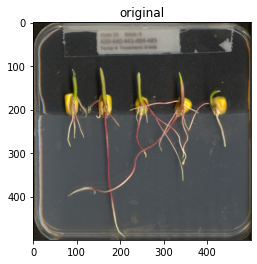

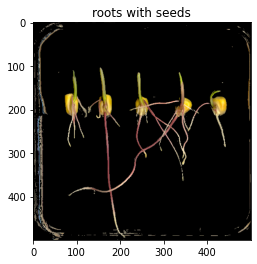

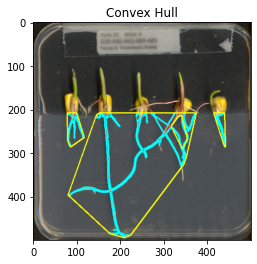

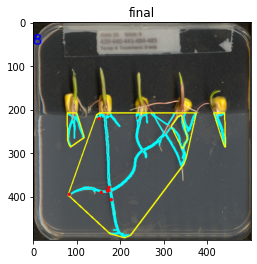

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math

#//load up the images
src = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB) )

#colors of roots
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
lower = np.array([0, 41, 101])
upper = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower, upper)
result = cv2.bitwise_and(src, src, mask=mask)

plt.figure()
plt.title('roots with seeds')
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))

#convert to grayscale & get dimensions of result
grayResult = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
length, width = grayResult.shape

# remove or black out the parts of iamge that will count for contours otherwise
radius = .83*min(length,width)
radius2 = .25*min(length,width)
for i in range(length):     # this is the row
    for j in range(width):  # this is the column
      if radius > ((i+length) + (i-width)) or radius2 > ((j+length) + (j-width)):
        grayResult[i,j] = 0

# plt.figure()
# plt.title('only roots')
# plt.imshow(cv.cvtColor(grayResult,cv.COLOR_BGR2RGB) )

# Find the contours
cnts = cv2.findContours(grayResult, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 300
rootCount = []
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        rootCount.append(c)
        cv2.drawContours(src,[c], -1, (255,255,0), 2)
        hull = cv.convexHull(c)
        conHull = cv.drawContours(src, [hull], -1, (0, 255, 255), 2)
        hull = cv.convexHull(c, returnPoints=False)
        defects = cv.convexityDefects(c, hull)

plt.figure()
plt.title('Convex Hull')
plt.imshow(cv.cvtColor(conHull,cv.COLOR_BGR2RGB))



if defects is not None:
  cnt = 0
for i in range(defects.shape[0]):  # calculate the angle
  s, e, f, d = defects[i][0]
  start = tuple(contours[s][0])
  end = tuple(contours[e][0])
  far = tuple(contours[f][0])
  a = np.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
  b = np.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
  c = np.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
  angle = np.arccos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))  #      cosine theorem
  if angle <= np.pi*4 :  # angle less than 90 degree, treat as fingers
    cnt += 1
    cv.circle(src, far, 4, [0, 0, 255], -1)
if cnt > 0:
  cnt = cnt+1
cv.putText(src, str(cnt), (0, 50), cv.FONT_HERSHEY_SIMPLEX,1, (255, 0, 0) , 2, cv.LINE_AA)

plt.figure()
plt.title('final')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB))

print("there at least " + str(cnt) + " roots")




## *Results*

Although a creative attempt to solve the problem, it seems dynamically trying to get the contour points around each root isn't that straightforward, given that the roots overlap each other in some parts, this causes issues since it's hard to seperate which roots from which seed.  However, I think this is some progress and gave another idea about trying to get each seed's roots.  Also I think if I knew my trig better and could adjust the angle such that I can have it count for most or all angles, this might actually work well, although I'm not completely sure as it seems like it doesn't see any convexity in the 2 smaller convexhulls.  I do want to note, I cropped the image around the first cornseed as a test to see if it picks it up an it does.  Anyway, this isn't quite what I was hoping for and I think I know what I need to do from here.

## Final try for Roots

Goal here is to isolate each corn seed and include its roots as a region of interest.  The idea being that if the code is localized in a specific area, then you don't get all the other contours.  In additon to limiting these as regions of interest I also want to try and get the count of the roots accurate to each of these roots, as best as poosible.   Forcing the code to run in a specified area makes it such that they tie to that region and that region is basically the cornseed. This is maybe too focused a solution, but its a way to address the issue of the contours overlappig each other and frankly I'm just determine to get this right.

seed 1 has  3 roots
seed 2 has  2 roots
seed 3 has  4 roots
seed 4 has  5 roots
seed 5 has  1 roots


there are a total of  15 roots


germination rate is 100 %


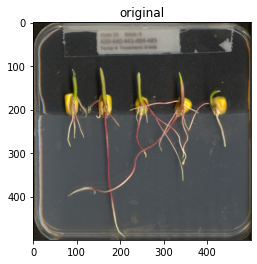

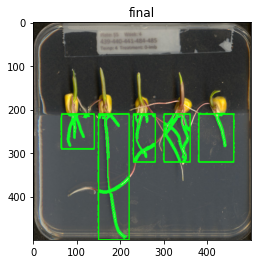

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math

#//load up the images
src = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB))

height, width= src.shape[:2]
image_gray= cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blank= np.zeros_like(image_gray)

########################################################################################
# SEED 1
########################################################################################
seed1BB= np.array([[(65,290),(65,210),(140,210),(140,290)]], dtype= np.int32)
seed1_ROI= cv2.fillPoly(blank, seed1BB,255)
seed1RootMask= cv2.bitwise_and(image_gray, seed1_ROI)

# blurred
blurredIm = cv.medianBlur(seed1RootMask, 5)
edges = cv.Canny(blurredIm,50,100)
dilated = cv2.dilate(edges, (3, 3), iterations=1)

# Find the contours
cnts = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 300
seed1RootCount = []
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        seed1RootCount.append(c)
        cv2.drawContours(src,[c], 0, (36,255,12), 2)

(cnt, hierarchy) = cv2.findContours(
    seed1RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

########################################################################################
# SEED 2
########################################################################################

seed2BB= np.array([[(150,height),(150,210),(220,210),(220,height)]], dtype= np.int32)
seed2_ROI= cv2.fillPoly(blank, seed2BB,255)
seed2RootMask= cv2.bitwise_and(image_gray, seed2_ROI)

# blurred
blurredIm = cv.medianBlur(seed2RootMask, 5)
edges = cv.Canny(blurredIm,50,100)
dilated = cv2.dilate(edges, (3, 3), iterations=1)

# Find the contours
cnts = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 700
seed2RootCount = []
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        seed2RootCount.append(c)
        cv2.drawContours(src,[c], 0, (36,255,12), 2)

(cnt, hierarchy) = cv2.findContours(
    seed2RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

########################################################################################
# SEED 3
########################################################################################
seed3BB= np.array([[(280,320),(280,210),(230,210),(230,320)]], dtype= np.int32)
seed3_ROI= cv2.fillPoly(blank, seed3BB,255)
seed3RootMask= cv2.bitwise_and(image_gray, seed3_ROI)
# blurred
blurredIm = cv.medianBlur(seed3RootMask, 7)

edges = cv.Canny(blurredIm,50,100)

# blurred
dilated = cv2.dilate(edges, (3, 3), iterations=1)


# Find the contours
cnts = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 750
seed3RootCount = []
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        seed3RootCount.append(c)
        cv2.drawContours(src,[c], 0, (36,255,12), 2)

(cnt, hierarchy) = cv2.findContours(
    seed3RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

# ########################################################################################
# SEED 4
##########################################################################################
seed4BB= np.array([[(360,320),(360,210),(300,210),(300,320)]], dtype= np.int32)
seed4_ROI= cv2.fillPoly(blank, seed4BB,255)
seed4RootMask= cv2.bitwise_and(image_gray, seed4_ROI)
# blurred
blurredIm = cv.medianBlur(seed4RootMask, 5)
edges = cv.Canny(blurredIm,50,100)
dilated = cv2.dilate(edges, (3, 3), iterations=1)
# Find the contours
cnts = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 2000
seed4RootCount = []
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        seed4RootCount.append(c)
        cv2.drawContours(src,[c], 0, (36,255,12), 2)

(cnt, hierarchy) = cv2.findContours(
    seed4RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
# ########################################################################################
# SEED 5
##########################################################################################
seed5BB= np.array([[(460,320),(460,210),(380,210),(380,320)]], dtype= np.int32)
seed5_ROI= cv2.fillPoly(blank, seed5BB,255)
seed5RootMask= cv2.bitwise_and(image_gray, seed5_ROI)
# # blurred
# blurredIm = cv.medianBlur(seed5RootMask, 5)

edges = cv.Canny(seed5RootMask,50,100)

# blurred
dilated = cv2.dilate(edges, (3, 3), iterations=0)


# Find the contours
cnts = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 8905
seed5RootCount = []
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        seed5RootCount.append(c)
        cv2.drawContours(src,[c], 0, (36,255,12), 2)

(cnt, hierarchy) = cv2.findContours(
    seed5RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

print('seed 1 has ',len(seed1RootCount), 'roots')
print('seed 2 has ',len(seed2RootCount), 'roots')
print('seed 3 has ',len(seed3RootCount), 'roots')
print('seed 4 has ',len(seed4RootCount), 'roots')
print('seed 5 has ',len(seed5RootCount), 'roots')

print('\n')

# ########################################################################################
# DRAWING CONTOURS FOR ENTIRE IMAGE
##########################################################################################

# gives bounding box coords of interest
ROI_seed1= np.array([[(65,290),(65,210),(140,210),(140,290)]], dtype= np.int32)
ROI_seed2= np.array([[(150,height),(150,210),(220,210),(220,height)]], dtype= np.int32)
ROI_seed3= np.array([[(280,320),(280,210),(230,210),(230,320)]], dtype= np.int32)
ROI_seed4= np.array([[(360,320),(360,210),(300,210),(300,320)]], dtype= np.int32)
ROI_seed5= np.array([[(460,320),(460,210),(380,210),(380,320)]], dtype= np.int32)



# fills in bounding box with white, blacks out everything else
seed1_ROI= cv2.fillPoly(blank, ROI_seed1,255)
seed2_ROI= cv2.fillPoly(blank, ROI_seed2,255)
seed3_ROI= cv2.fillPoly(blank, ROI_seed3,255)
seed4_ROI= cv2.fillPoly(blank, ROI_seed4,255)
seed5_ROI= cv2.fillPoly(blank, ROI_seed5,255)

# fills ROI with image, masked area of interest
region_of_interest_image= cv2.bitwise_and(image_gray, seed1_ROI)
region_of_interest_image= cv2.bitwise_and(image_gray, seed2_ROI)
region_of_interest_image= cv2.bitwise_and(image_gray, seed3_ROI)
region_of_interest_image= cv2.bitwise_and(image_gray, seed4_ROI)
region_of_interest_image= cv2.bitwise_and(image_gray, seed5_ROI)

# blurred
blurredIm = cv.medianBlur(region_of_interest_image, 5)
edges = cv.Canny(blurredIm,50,100)
dilated = cv2.dilate(edges, (3, 3), iterations=1)
# Find the contours
cnts = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 300
rootCount = []
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        rootCount.append(c)
        cv2.drawContours(src,[c], 0, (36,255,12), 2)

(cnt, hierarchy) = cv2.findContours(
    region_of_interest_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.figure()
plt.title('final')
plt.imshow(rgb)

print('there are a total of ',len(seed1RootCount)+len(seed2RootCount)+len(seed3RootCount)
+len(seed4RootCount)+len(seed5RootCount), 'roots')

print('\n')

if (len(rootCount)) >= 5:
  print('germination rate is 100 %')
else:
  print('some seeds are missing roots')


## *Results*

Finally, there is some sort of real representation of the roots and the seed they belong too.  Again, this is probably overkill, but this is probably the best I can do on this.  I had to fin tune the numbers a bit and really drill down to get this right or mostly right, but I think this is pretty close all the same.  The limitations in just drawing the contours in prior methods, which overlapped each other are bypassed, at least a little bit and likewise we can assign contours to a 'seed' region and just add those numbers up as a total.  This meets my expectations for the requirements and minus the last seed which reprots 2 roots rather than 1, although teechnically I think last cornseed does have 2 roots, it just pops out by the sprout.

# Extra Credit Analysis

While image processing and analyzing there are some details and discoveries I feel are worth noting depedning on the conditions of where the corn is grown.  

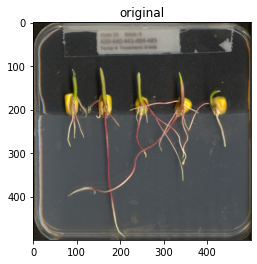

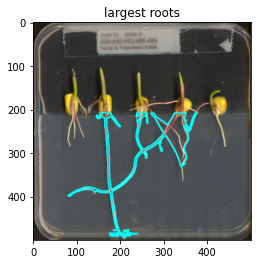

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math


#//load up the images
img = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
#src1 = cv.imread("/content/mydata/man.jpg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB) )

#colors of roots
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower = np.array([0, 41, 101])
upper = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower, upper)
result = cv2.bitwise_and(img, img, mask=mask)

grayResult = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

radius = .83*min(length,width)
radius2 = .25*min(length,width)
for i in range(length):     # this is the row
    for j in range(width):  # this is the column
      if radius > ((i+length) + (i-width)) or radius2 > ((j+length) + (j-width)):
        grayResult[i,j] = 0



blurred = cv.blur(grayResult, (2,2))
ret, thresh = cv.threshold(blurred,0,255,cv.THRESH_BINARY)


contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = max(contours, key=lambda x: cv.contourArea(x))
hull = cv.convexHull(contours)
cv.drawContours(img, [contours], -1, (255,255,0), 2)


plt.figure()
plt.title('largest roots')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB) )



To analyze the roots from sorting the contours around the roots to the largest the first and last cornseeds aren't highlighted.  Its likely that these seeds are still early on in the germination rate; however, if they are being grown from the same soil, then this could indicate they aren't getting proper care:  Be it nutrients or sunlight.  

Also, While looking at the coleoptiles, I noticed that the through the RGB trheshlding for the colors, it only noitces that color towards the top of the coleoptile.  Meaning there is discoloration in the coleoptile.  

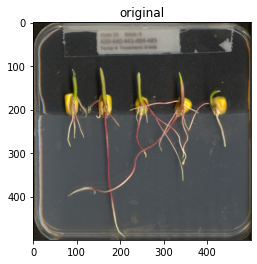

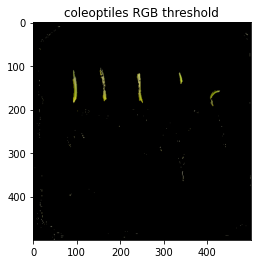

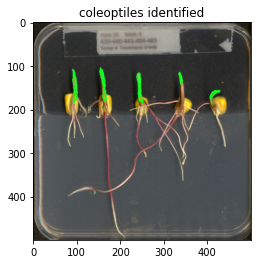

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

#//load up the images
src = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
#src1 = cv.imread("/content/mydata/man.jpg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB) )

# RGB threshold for for colors on coleoptiles
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
lower = np.array([28, 36, 97])
upper = np.array([42, 255, 228])
mask = cv2.inRange(hsv, lower, upper)
result = cv2.bitwise_and(src, src, mask=mask)
plt.figure()
plt.title('coleoptiles RGB threshold')
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))

# convert to grayscale
gray = cv.cvtColor(result, cv.COLOR_BGR2GRAY)

# Find the contours
cnts = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 50
coleoCount = []
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        coleoCount.append(c)
        cv2.drawContours(src,[c], 0, (36,255,12), 2)

plt.figure()
plt.title('coleoptiles identified')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB) )




# Sources
--------------------------------------------------------------------------------
https://www.askpython.com/python/examples/count-objects-in-an-image#:~:text=Count%20objects%20in%20the%20image&text=To%20count%20the%20number%20of,objects%20found%20in%20the%20picture.

https://stackoverflow.com/questions/62039403/python-opencv-finding-the-biggest-contour

https://stackoverflow.com/questions/56711662/draw-contours-around-objects-with-opencv

https://github.com/madhav727/hand-detection-and-finger-counting/blob/master/finger_counting_video.py

https://www.geeksforgeeks.org/count-number-of-object-using-python-opencv/

http://www.learningaboutelectronics.com/Articles/Region-of-interest-in-an-image-Python-OpenCV.php